In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_pickle("final_df.pkl")

In [3]:
df

,batting_team,bowling_team,venue,current_score,run_rate,balls_left,wickets_left,runs_in_last_30_balls,rr_in_last_30_overs,final_score
29,New Zealand,India,McLean Park,13,2.785714,272.0,9,13.0,2.6,254
30,New Zealand,India,McLean Park,13,2.689655,271.0,9,12.0,2.4,254
31,New Zealand,India,McLean Park,13,2.600000,270.0,9,12.0,2.4,254
32,New Zealand,India,McLean Park,13,2.516129,269.0,9,12.0,2.4,254
33,New Zealand,India,McLean Park,15,2.812500,268.0,9,13.0,2.6,254
...,...,...,...,...,...,...,...,...,...,...
1479067,Afghanistan,India,Arun Jaitley Stadium,264,5.351351,4.0,2,34.0,6.8,272
1479068,Afghanistan,India,Arun Jaitley Stadium,266,5.373737,3.0,2,35.0,7.0,272
1479069,Afghanistan,India,Arun Jaitley Stadium,270,5.436242,2.0,2,35.0,7.0,272
1479070,Afghanistan,India,Arun Jaitley Stadium,271,5.438127,1.0,2,36.0,7.2,272


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 621625 entries, 29 to 1479071
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   batting_team           621625 non-null  object 
 1   bowling_team           621625 non-null  object 
 2   venue                  621625 non-null  object 
 3   current_score          621625 non-null  int64  
 4   run_rate               621625 non-null  float64
 5   balls_left             621625 non-null  float64
 6   wickets_left           621625 non-null  int32  
 7   runs_in_last_30_balls  621625 non-null  float64
 8   rr_in_last_30_overs    621625 non-null  float64
 9   final_score            621625 non-null  int64  
dtypes: float64(4), int32(1), int64(2), object(3)
memory usage: 49.8+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,current_score,run_rate,balls_left,wickets_left,runs_in_last_30_balls,rr_in_last_30_overs,final_score
count,621625.000000,621625.000000,621625.000000,621625.000000,621625.000000,621625.000000,621625.000000
mean,124.872492,4.621804,141.342721,6.695693,24.959001,4.991800,252.240134
std,72.887902,1.149948,77.279377,2.252985,10.213482,2.042696,63.750092
min,2.000000,0.272727,0.000000,0.000000,0.000000,0.000000,12.000000
25%,66.000000,3.857143,76.000000,5.000000,18.000000,3.600000,211.000000
50%,115.000000,4.574257,143.000000,7.000000,24.000000,4.800000,254.000000
75%,174.000000,5.329949,208.000000,8.000000,30.000000,6.000000,294.000000
max,498.000000,14.017241,280.000000,10.000000,101.000000,20.200000,498.000000


In [7]:
df.describe(include= "O")

,batting_team,bowling_team,venue
count,621625,621625,621625
unique,27,28,186
top,Australia,India,Harare Sports Club
freq,68874,68706,29977


In [8]:
cat_col = [col for col in df.columns if df[col].dtype == "O"]
num_col = [col for col in df.columns if df[col].dtype != "O"]

In [9]:
num_col

['current_score',
 'run_rate',
 'balls_left',
 'wickets_left',
 'runs_in_last_30_balls',
 'rr_in_last_30_overs',
 'final_score']

In [ ]:
fig, ax = plt.subplots(len(num_col), 2, figsize=(10,15))

for i, col in enumerate(num_col):
    sns.histplot(x=df[col], edgecolor=None, bins=50, kde =True , ax=ax[i,0])
    ax[i,0].set_title(f"Distribution of {col}")
    
    sns.boxplot(x=df[col], ax=ax[i,1] )
    ax[i,1].set_title(f"Boxplot of {col}")
    
plt.tight_layout()

In [13]:
from scipy.stats import boxcox

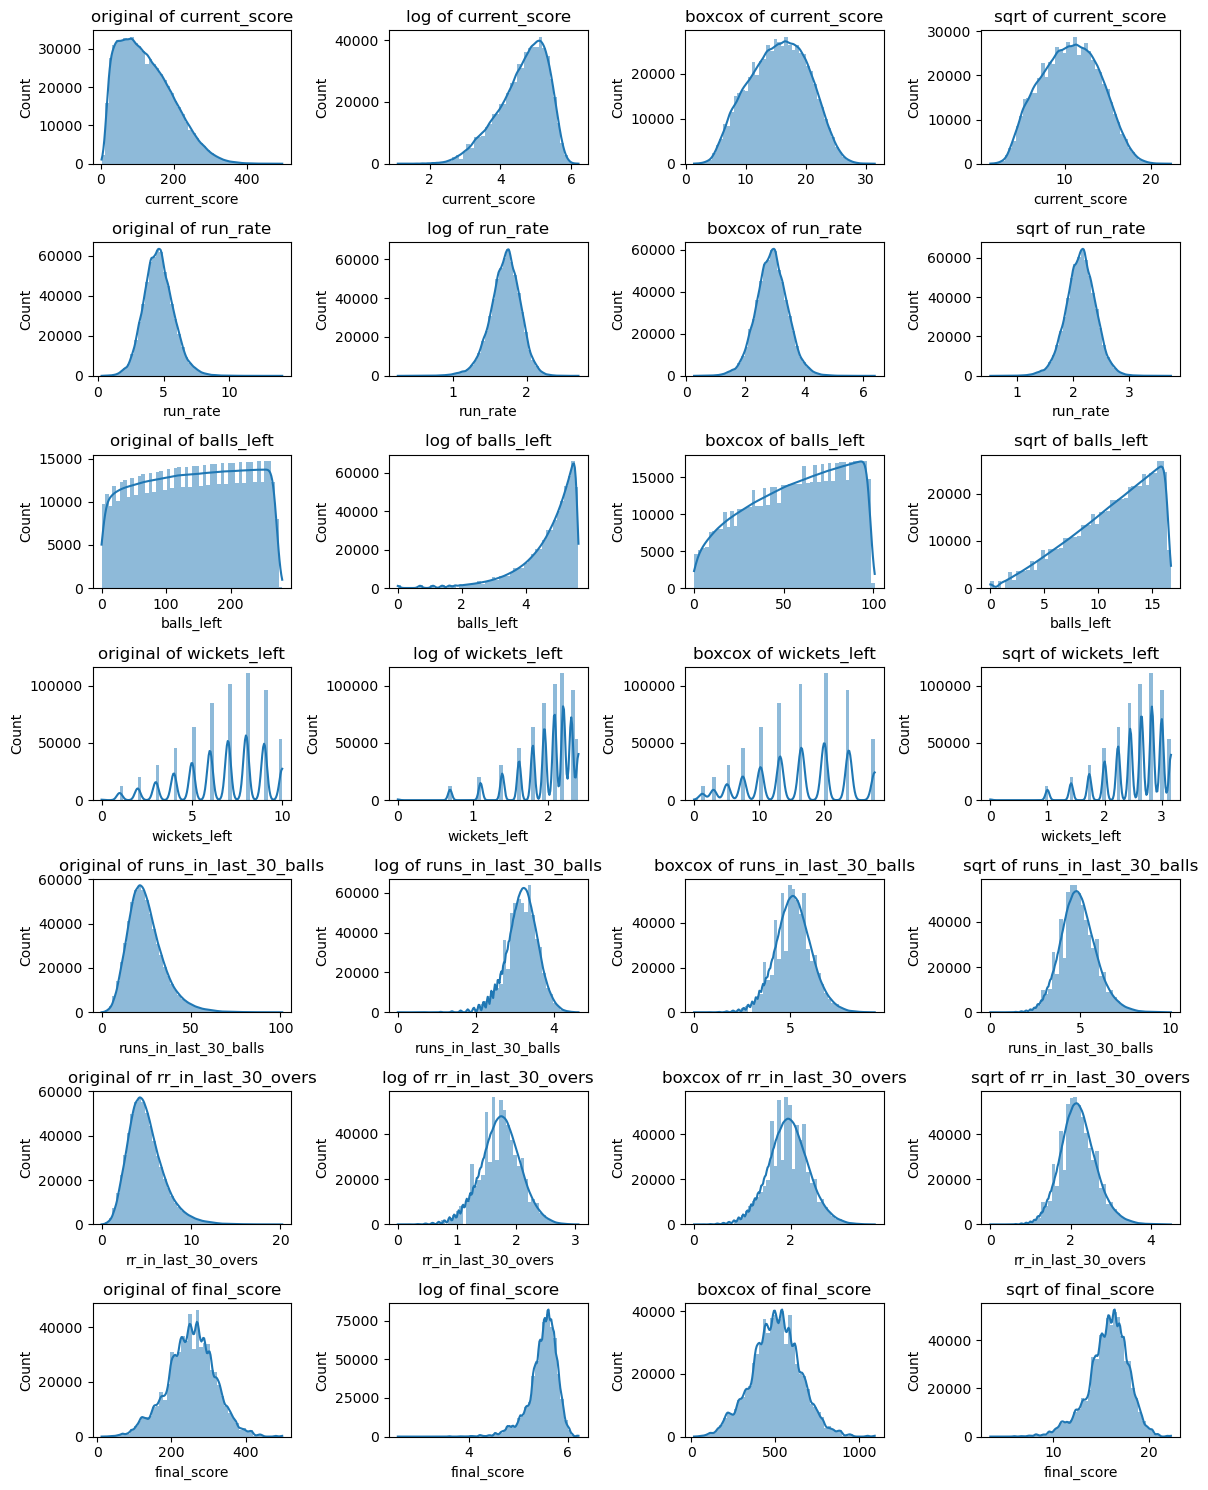

In [14]:
fig, ax = plt.subplots(len(num_col),4 , figsize=(12,15))

for i, col in enumerate(num_col):
    sns.histplot(x=df[col], edgecolor=None, bins=50, kde =True , ax=ax[i,0])
    ax[i,0].set_title(f"original of {col}")
    
    sns.histplot(x=np.log1p(df[col]), edgecolor=None, bins=50, kde =True , ax=ax[i,1])
    ax[i,1].set_title(f"log of {col}")
    
    transformed_col, _ = boxcox(df[col] + 1)
    sns.histplot(x=transformed_col, edgecolor=None, bins=50, kde =True , ax=ax[i,2])
    ax[i,2].set_title(f"boxcox of {col}")
    
    sns.histplot(x=np.sqrt(df[col]), edgecolor=None, bins=50, kde =True , ax=ax[i,3])
    ax[i,3].set_title(f"sqrt of {col}")
    
    
plt.tight_layout()

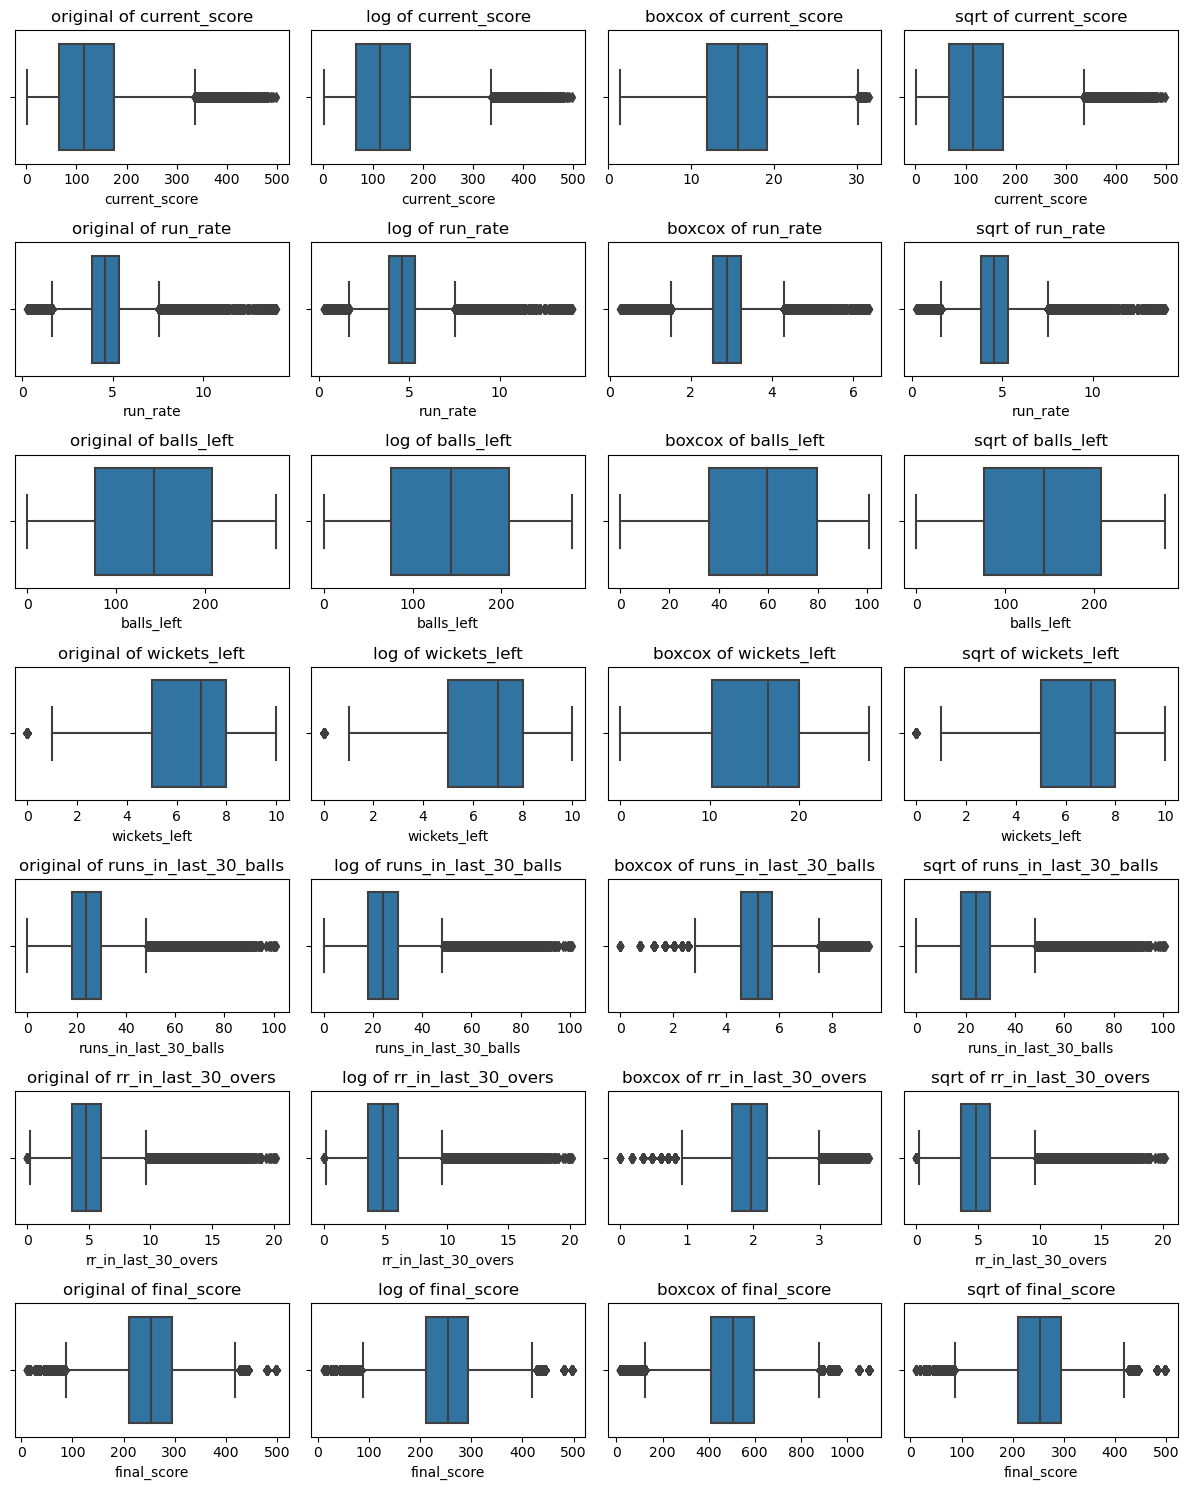

In [15]:
fig, ax = plt.subplots(len(num_col),4 , figsize=(12,15))

for i, col in enumerate(num_col):
    sns.boxplot(x=df[col], ax=ax[i,0] )
    ax[i,0].set_title(f"original of {col}")
    
    sns.boxplot(x=df[col], ax=ax[i,1] )
    ax[i,1].set_title(f"log of {col}")
    
    transformed_col, _ = boxcox(df[col] + 1)
    sns.boxplot(x=transformed_col, ax=ax[i,2] )
    ax[i,2].set_title(f"boxcox of {col}")
    
    sns.boxplot(x=df[col], ax=ax[i,3] )
    ax[i,3].set_title(f"sqrt of {col}")
    
    
plt.tight_layout()

No transformation Columns:

- balls_left
- wicket_left
- final_score

boxcox transformation columns:

- current_score
- run_rate
- runs_in_last_30_balls
- rr_in_last_30_balls

In [10]:
df_copy = df.copy()

In [11]:
df_copy = df_copy.sample(frac=1)

In [12]:
teams = ["Australia", "Sri Lanka", "India", "England","South Africa", "Pakistan","Bangladesh", "Afghanistan", "Netherlands", "New Zealand"]
venues= ["Arun Jaitley Stadium", "Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium", "Eden Gardens",
         "Himachal Pradesh Cricket Association Stadium", "M Chinnaswamy Stadium", "MA Chidambaram Stadium, Chepauk", "Maharashtra Cricket Association Stadium",
         "Rajiv Gandhi International Stadium, Uppal", "Wankhede Stadium","Narendra Modi Stadium, Ahmedabad"]


In [13]:
def other_team(team):
    return team if team in teams else "other"
df_copy["batting_team"] = df_copy["batting_team"].apply(other_team)
df_copy["bowling_team"] = df_copy["bowling_team"].apply(other_team)

def other_team(venue):
    return venue if venue in venues else "other"
df_copy["venue"] = df_copy["venue"].apply(other_team)

In [14]:
df_copy

,batting_team,bowling_team,venue,current_score,run_rate,balls_left,wickets_left,runs_in_last_30_balls,rr_in_last_30_overs,final_score
598496,Australia,other,other,114,5.302326,171.0,9,14.0,2.8,329
1039264,Bangladesh,Sri Lanka,other,216,4.835821,32.0,2,19.0,3.8,261
53918,India,Australia,other,80,5.106383,206.0,9,39.0,7.8,283
20357,India,England,other,175,4.375000,60.0,6,26.0,5.2,250
1286443,other,other,other,123,2.774436,34.0,1,33.0,6.6,147
...,...,...,...,...,...,...,...,...,...,...
736685,other,other,other,62,3.795918,202.0,6,16.0,3.2,216
304191,Bangladesh,South Africa,other,51,3.642857,216.0,6,27.0,5.4,173
475124,Pakistan,other,other,10,2.000000,270.0,10,10.0,2.0,317
844750,other,other,other,78,8.357143,244.0,10,46.0,9.2,327


In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [33]:
X = df_copy.drop(columns=['final_score'])
y = df_copy['final_score']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse_output=False), ['batting_team', 'bowling_team', 'venue'])
], remainder='passthrough')

# Linear Regression Pipeline
linear_pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', RobustScaler()),
    ('step3', LinearRegression(n_jobs=-1)) 
])

# Random Forest Regressor Pipeline
rf_pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', StandardScaler()),
    ('step3', RandomForestRegressor(n_jobs=-1, random_state=1)) 


# k-Nearest Neighbors Regressor Pipeline
knn_pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', StandardScaler()),
    ('step3', KNeighborsRegressor(n_neighbors=5, n_jobs=-1)) 
])

# XGBoost Regressor Pipeline
xgb_pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', StandardScaler()),
    ('step3', XGBRegressor(n_estimators=1000, learning_rate=0.2, max_depth=12, random_state=1, n_jobs=-1))
])

# CatBoost Regressor Pipeline
catboost_pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', StandardScaler()),
    ('step3', CatBoostRegressor(iterations=100, learning_rate=0.2, depth=12, random_seed=1, verbose=0))
])

# LightGBM Regressor Pipeline
lgbm_pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', StandardScaler()),
    ('step3', LGBMRegressor(n_estimators=100, learning_rate=0.2, max_depth=12, num_leaves=64, random_state=1))
])


pipelines = {
    'Linear Regression': linear_pipe,
    'Random Forest': rf_pipe,
    'k-Nearest Neighbors': knn_pipe,
    'XGBoost': xgb_pipe,
    'CatBoost': catboost_pipe,
    'LightGBM': lgbm_pipe
}


results_list = []

for model_name, model_pipe in pipelines.items():
    model_pipe.fit(X_train, y_train)
    
    y_pred_train = model_pipe.predict(X_train)
    r2_train = r2_score(y_train, y_pred_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    y_pred_test = model_pipe.predict(X_test)
    r2_test = r2_score(y_test, y_pred_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    
    results_list.append({
        'Model': model_name,
        'Training R2': r2_train,
        'Training MAE': mae_train,
        'Testing R2': r2_test,
        'Testing MAE': mae_test
    })


results_df = pd.DataFrame(results_list)


results_df

C:\Users\shrey\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\shrey\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\shrey\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\shrey\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sp

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1066
[LightGBM] [Info] Number of data points in the train set: 497300, number of used features: 39
[LightGBM] [Info] Start training from score 252.233225


,Model,Training R2,Training MAE,Testing R2,Testing MAE
0,Linear Regression,0.596250,30.034634,0.595451,30.078487
1,Random Forest,0.984438,3.768165,0.908194,9.732952
2,k-Nearest Neighbors,0.940015,6.243186,0.901623,8.548197
3,XGBoost,0.989328,3.316991,0.899248,11.144790
4,CatBoost,0.743672,23.137587,0.737203,23.410149
5,LightGBM,0.730415,23.829480,0.722032,24.159266


C:\Users\shrey\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\shrey\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\shrey\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\shrey\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sp

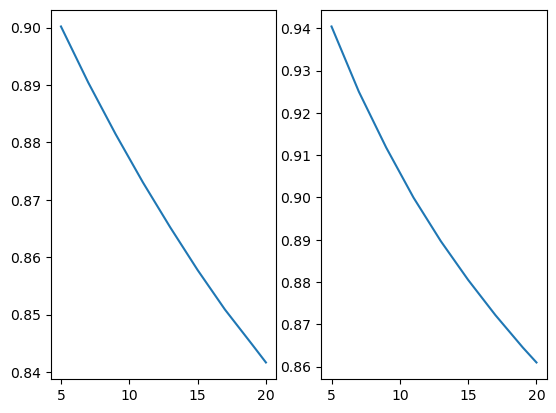

In [57]:
test_r2 = []
train_r2 = []
for i in [5,7,9,11,13,15,17,19,20]:
    knn_pipe = Pipeline(steps=[
        ('step1', trf),
        ('step2', StandardScaler()),
        ('step3', KNeighborsRegressor(n_neighbors=i, n_jobs=-1)) 
    ])
    
    knn_pipe.fit(X_train, y_train)
    
    y_pred_train = knn_pipe.predict(X_train)
    r2_train = r2_score(y_train, y_pred_train)
    train_r2.append(r2_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)

    y_pred_test = knn_pipe.predict(X_test)
    r2_test = r2_score(y_test, y_pred_test)
    test_r2.append(r2_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    
    
plt.subplot(1,2,1)
plt.plot([5,7,9,11,13,15,17,19,20], test_r2)

plt.subplot(1,2,2)
plt.plot([5,7,9,11,13,15,17,19,20], train_r2)

In [60]:
outliers = ['current_score',
'run_rate',
'runs_in_last_30_balls',
'rr_in_last_30_overs']

In [61]:
for i in outliers:
    q1 = np.percentile(df_copy[i], 25)
    q3 = np.percentile(df_copy[i], 75)
    
    iqr =q3-q1
    
    upper =q3 + (1.5*iqr)
    lower =q1 - (1.5*iqr)
    
    df_copy[i]= np.where(df_copy[i] > upper ,df_copy[i].median() , np.where(df_copy[i] < lower , df_copy[i].median(), df_copy[i]))

In [23]:
X = df_copy.drop(columns=['final_score'])
y = df_copy['final_score']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse=False), ['batting_team', 'bowling_team', 'venue'])
], remainder='passthrough')

knn_pipe = Pipeline(steps=[
        ('step1', trf),
        ('step2', RobustScaler()),
        ('step3', KNeighborsRegressor(n_neighbors=3, n_jobs=-1)) 
    ])
    
knn_pipe.fit(X_train, y_train)
    
y_pred_train = knn_pipe.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

y_pred_test = knn_pipe.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

C:\Users\shrey\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [24]:
r2_test , r2_train

(0.9023820774774696, 0.9559476729649642)

In [20]:
df_copy.shape

(621625, 10)

In [169]:
df_copy = df_copy[(df_copy["batting_team"] != "other") & (df_copy["bowling_team"] != "other")]

In [170]:
df_copy.shape

(349901, 10)

In [125]:

X = df_copy.drop(columns=['final_score'])
y = df_copy['final_score']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

trf = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse_output=False), ['batting_team', 'bowling_team', 'venue'])
], remainder='passthrough')

# Linear Regression Pipeline
linear_pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', StandardScaler()),
    ('step3', LinearRegression(n_jobs=-1)) 
])

# Random Forest Regressor Pipeline
rf_pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', StandardScaler()),
    ('step3', RandomForestRegressor(n_jobs=-1, random_state=1)) 
])

# k-Nearest Neighbors Regressor Pipeline
knn_pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', StandardScaler()),
    ('step3', KNeighborsRegressor(n_neighbors=5, n_jobs=-1)) 
])

# XGBoost Regressor Pipeline
xgb_pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', StandardScaler()),
    ('step3', XGBRegressor(n_estimators=1000, learning_rate=0.2, max_depth=12, random_state=1, n_jobs=-1))
])

# CatBoost Regressor Pipeline
catboost_pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', StandardScaler()),
    ('step3', CatBoostRegressor(iterations=100, learning_rate=0.2, depth=12, random_seed=1, verbose=0))
])

# LightGBM Regressor Pipeline
lgbm_pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', StandardScaler()),
    ('step3', LGBMRegressor(n_estimators=100, learning_rate=0.2, max_depth=12, num_leaves=64, random_state=1))
])


pipelines = {
    'Linear Regression': linear_pipe,
    'Random Forest': rf_pipe,
    'k-Nearest Neighbors': knn_pipe,
    'XGBoost': xgb_pipe,
    'CatBoost': catboost_pipe,
    'LightGBM': lgbm_pipe
}


results_list = []

for model_name, model_pipe in pipelines.items():
    model_pipe.fit(X_train, y_train)
    
    y_pred_train = model_pipe.predict(X_train)
    r2_train = r2_score(y_train, y_pred_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    y_pred_test = model_pipe.predict(X_test)
    r2_test = r2_score(y_test, y_pred_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    
    results_list.append({
        'Model': model_name,
        'Training R2': r2_train,
        'Training MAE': mae_train,
        'Testing R2': r2_test,
        'Testing MAE': mae_test
    })


results_df = pd.DataFrame(results_list)

results_df

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1050
[LightGBM] [Info] Number of data points in the train set: 279920, number of used features: 37
[LightGBM] [Info] Start training from score 259.217044


,Model,Training R2,Training MAE,Testing R2,Testing MAE
0,Linear Regression,0.602463,29.159726,0.604567,28.936501
1,Random Forest,0.989820,2.820492,0.937370,7.291384
2,k-Nearest Neighbors,0.959005,4.312491,0.932989,5.978894
3,XGBoost,0.997664,1.203697,0.935799,8.151765
4,CatBoost,0.794093,20.259190,0.788869,20.446624
5,LightGBM,0.781658,21.034431,0.774308,21.260551


In [151]:
new_data = {
    'batting_team': 'India',
    'bowling_team': 'Sri Lanka',
    'venue': 'Wankhede Stadium',
    'current_score': 120,
    'run_rate': 6,
    'balls_left': 180,
    'wickets_left': 9,
    'runs_in_last_30_balls': 32,
    'rr_in_last_30_overs': 5.33
}

# Add the new row to the DataFrame using loc
pred.loc[len(pred)] = new_data
xgb_pipe.predict(pred.tail(1)) ,knn_pipe.predict(pred.tail(1)),rf_pipe.predict(pred.tail(1))

(array([310.57388], dtype=float32), array([255.]), array([302.51]))

In [168]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(knn_pipe, f)